# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>ALIU A. ADEBIYI</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# Data Description and Missing Value Analysis

In [6]:
#Describing the data
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [56]:
data.isna().sum()  #there are no missing values

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

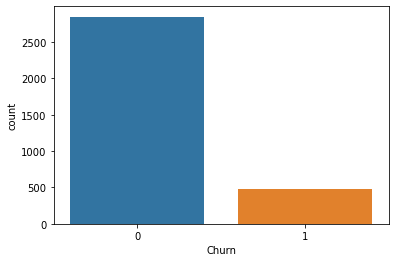

In [16]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'])

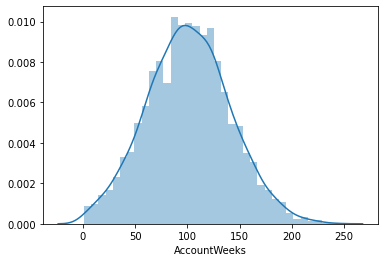

In [19]:
# Example EDA
sns.distplot(data['AccountWeeks'])

In [39]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

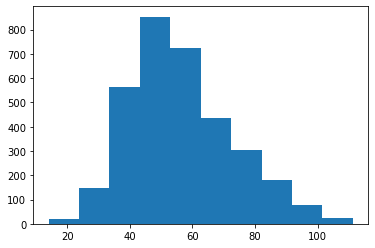

In [48]:
data['MonthlyCharge'].hist(grid=False, bins=10)

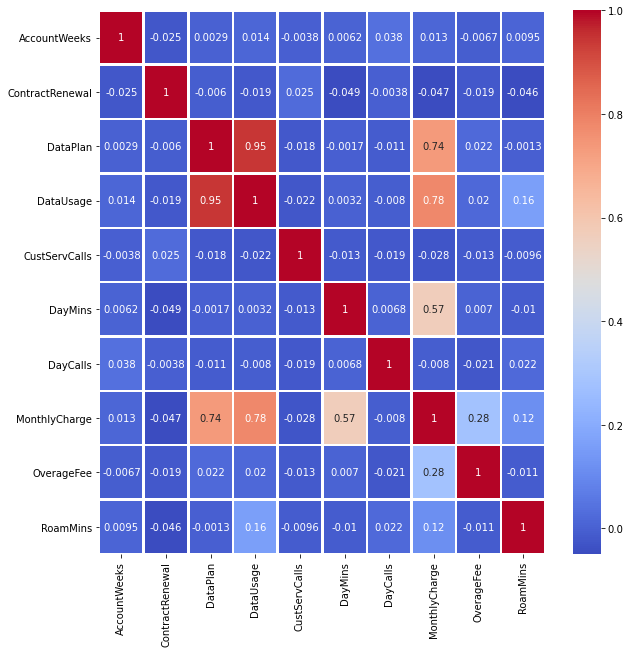

In [79]:
#HEATMAP PLOT TO CHECK AND DROP CORRELATION VARIABLES IF ANY
data_corr = data.drop('Churn', axis=1).corr()
data_corr
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap="coolwarm", linecolor="white", linewidth=1.5)

In [122]:
#dropping correlated one of correlated variables
new_data_uncorr=data.drop('MonthlyCharge', axis=1)
new_data_uncorr.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,7.42,10.1


# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [124]:
print(f'Columns of uncorrelated data:\n {new_data_uncorr.columns}')
print('\n')
print('***********************************')
print('\n')
print(f'Are there any duplicated values: {new_data_uncorr.duplicated()}')

Columns of uncorrelated data:
 Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'OverageFee', 'RoamMins'],
      dtype='object')


***********************************


Are there any duplicated values: 0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool


In [125]:
#Detecting and removing outliers from X features if any
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(new_data_uncorr))
print(z)
print(f"\n*************************************\n The outlier's length: {len(np.where(z>3)[0])}")

[[0.41167182 0.67648946 0.32758048 ... 0.47664315 0.0715836  0.08500823]
 [0.41167182 0.14906505 0.32758048 ... 1.12450284 0.10708191 1.24048169]
 [0.41167182 0.9025285  0.32758048 ... 0.67598459 1.57434567 0.70312091]
 ...
 [0.41167182 1.83505538 0.32758048 ... 0.42680779 1.73094204 1.3837779 ]
 [0.41167182 2.08295458 3.05268496 ... 0.22746635 0.81704825 1.87621082]
 [0.41167182 0.67974475 0.32758048 ... 0.62614923 1.28129669 1.24048169]]

*************************************
 The outlier's length: 418


In [128]:
#Removing the outliers
outliers = list(set(np.where(z > 3)[0]))
new_data = new_data_uncorr.drop(outliers,axis = 0)
display(new_data)

len(new_data)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,0.00,2,134.7,98,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,14.44,14.1


2926

In [142]:
#Getting the features(i.e. X) and target (i.e. y)values
X_features = new_data.drop("Churn", axis=1)
y=new_data["Churn"]

In [148]:
#Scaling the X features
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_features)

In [151]:
#splitting X features into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# logistic regression model

In [157]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

print("Accuracy of train:",logmodel.score(X_train,y_train))
print("Accuracy of test:",logmodel.score(X_test,y_test))

Accuracy of train: 0.89306640625
Accuracy of test: 0.9009111617312073


In [171]:
#Logit model: making prediction
predLog= logmodel.predict(X_test)

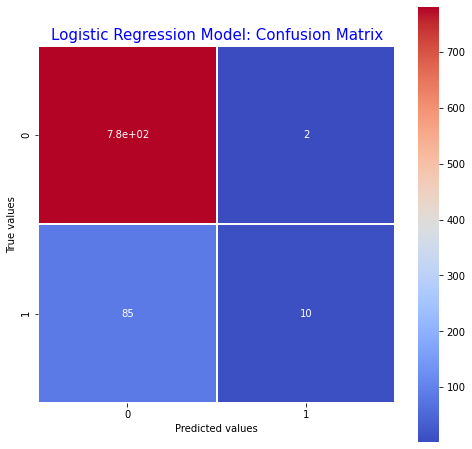

In [172]:
#Logit model: confusion matrix
from sklearn.metrics import confusion_matrix
cmLog = confusion_matrix(y_test, predLog)
plt.figure(figsize=(8,8))
ax1 = sns.heatmap(cmLog, annot=True, square = True, cmap="coolwarm", linecolor="white", linewidth="1")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Logistic Regression Model: Confusion Matrix", fontsize=15, color="blue")
plt.show()

In [174]:
#Logit model: classification
from sklearn.metrics import classification_report
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       783
           1       0.83      0.11      0.19        95

    accuracy                           0.90       878
   macro avg       0.87      0.55      0.57       878
weighted avg       0.89      0.90      0.86       878



In [184]:
#Logit model: Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
log_accuracy = accuracy_score(y_test, predLog)
log_recall = recall_score(y_test, predLog)
log_precision = precision_score(y_test, predLog)
log_f1_score = f1_score(y_test, predLog)
print("Logistic Regression Model Evaluation metrics \n")
print(f"Accuracy: {log_accuracy}")
print(f"Recall: {log_recall}")
print(f"Precision: {log_precision}")
print(f"F1_score: {log_f1_score}")


Logistic Regression Model Evaluation metrics 

Accuracy: 0.9009111617312073
Recall: 0.10526315789473684
Precision: 0.8333333333333334
F1_score: 0.18691588785046728


# Decission Tree model

In [186]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9031890660592256


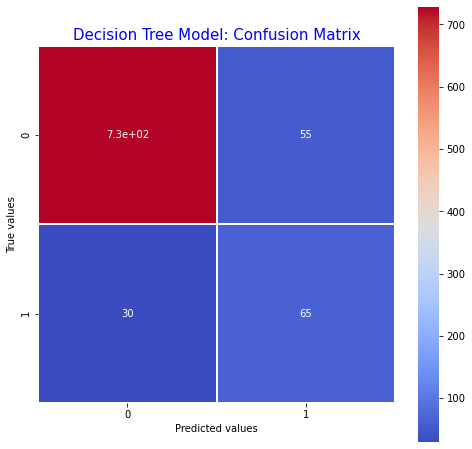

In [203]:
#Decision Tree: making prediction
predclf= clf.predict(X_test)

#Decision Tree: confusion matrix
from sklearn.metrics import confusion_matrix
cmclf = confusion_matrix(y_test,predclf)
plt.figure(figsize=(8,8))
ax1 = sns.heatmap(cmclf, annot=True, square = True, cmap="coolwarm", linecolor="white", linewidth="1")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Decision Tree Model: Confusion Matrix", fontsize=15, color="blue")
plt.show()

In [192]:
#Decision tree: classification
from sklearn.metrics import classification_report
print(classification_report(y_test, predclf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       783
           1       0.54      0.68      0.60        95

    accuracy                           0.90       878
   macro avg       0.75      0.81      0.77       878
weighted avg       0.92      0.90      0.91       878



In [194]:
#Decision Tree: Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
clf_accuracy = accuracy_score(y_test, predclf)
clf_recall = recall_score(y_test, predclf)
clf_precision = precision_score(y_test, predclf)
clf_f1_score = f1_score(y_test, predclf)
print("Decision Tree Model Evaluation metrics \n")
print(f"Accuracy: {clf_accuracy}")
print(f"Recall: {clf_recall}")
print(f"Precision: {clf_precision}")
print(f"F1_score: {clf_f1_score}")

Decision Tree Model Evaluation metrics 

Accuracy: 0.9031890660592256
Recall: 0.6842105263157895
Precision: 0.5416666666666666
F1_score: 0.6046511627906976


# Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
print("Accuracy of train:",rfc.score(X_train,y_train))
print("Accuracy of test:",rfc.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9510250569476082


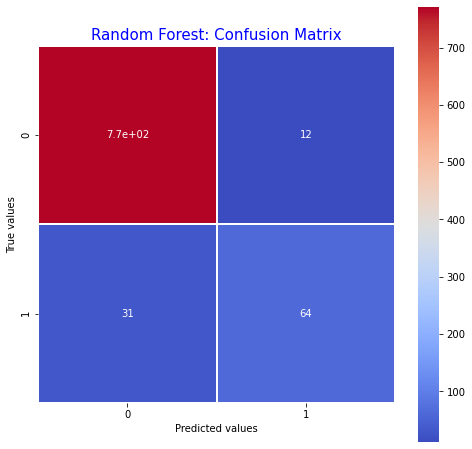

In [205]:
#Random Forest: making prediction
predrfc= rfc.predict(X_test)

#Random Forest: confusion matrix
from sklearn.metrics import confusion_matrix
cmrfc = confusion_matrix(y_test,predrfc)
plt.figure(figsize=(8,8))
ax1 = sns.heatmap(cmrfc, annot=True, square = True, cmap="coolwarm", linecolor="white", linewidth="1")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Random Forest: Confusion Matrix", fontsize=15, color="blue")
plt.show()

In [207]:
#Random Forest: classification
from sklearn.metrics import classification_report
print(classification_report(y_test, predrfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       783
           1       0.84      0.67      0.75        95

    accuracy                           0.95       878
   macro avg       0.90      0.83      0.86       878
weighted avg       0.95      0.95      0.95       878



In [208]:
#Random Forest: Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
rfc_accuracy = accuracy_score(y_test, predrfc)
rfc_recall = recall_score(y_test, predrfc)
rfc_precision = precision_score(y_test, predrfc)
rfc_f1_score = f1_score(y_test, predrfc)
print("Random Forest Model Evaluation metrics \n")
print(f"Accuracy: {rfc_accuracy}")
print(f"Recall: {rfc_recall}")
print(f"Precision: {rfc_precision}")
print(f"F1_score: {rfc_f1_score}")

Random Forest Model Evaluation metrics 

Accuracy: 0.9510250569476082
Recall: 0.6736842105263158
Precision: 0.8421052631578947
F1_score: 0.7485380116959064


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [221]:
#Analysising performance of evaluation metrics of each model
Combined_metrics = {"LogisticsRegression": [log_accuracy, log_recall, log_precision, log_f1_score],
                   "DecsionTree":[clf_accuracy, clf_recall, clf_precision, clf_f1_score],
                   "RandomForest": [rfc_accuracy, rfc_recall, rfc_precision, rfc_f1_score]}
pd.DataFrame(Combined_metrics, index=["Accuracy","Recall","Precsion","F1_score"])

,LogisticsRegression,DecsionTree,RandomForest
Accuracy,0.900911,0.903189,0.951025
Recall,0.105263,0.684211,0.673684
Precsion,0.833333,0.541667,0.842105
F1_score,0.186916,0.604651,0.748538


## Comments

Customers' churn, which is one of the most important and challenging problems faced by business organization, was analysed using three ML models (<b>Logistic Regression Model, Decision Tree Model, and Random Forest Classifier Model</b>).
    The performance metrics of the model were showned in the table above. 
    Checking the Accuracy column, it showed that the best model for customers churn analysis is Randomforest model, beccause it has the highgest accuracy score of <b>95%</b>. 
    The other metrics score that is, recall, precison, F1_score were also the highest for RandomForest classification model. 